In [1]:
import sys
!{sys.executable} -m pip install upsetplot

  Stored in directory: /Users/rensholmer/Library/Caches/pip/wheels/13/36/dc/d8ddb5e3e52e4be566c568a98933914b8df522a4f8b6e88513
Successfully built upsetplot


In [2]:
import pandas as pd
from sklearn.datasets import load_boston
from matplotlib import pyplot as plt
from upsetplot import UpSet

In [14]:
# Load the dataset into a DataFrame
boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)

In [15]:
# Get five features most correlated with median house value
correls = boston_df.corrwith(pd.Series(boston.target),
                             method='spearman').sort_values()
top_features = correls.index[-5:]

# Get a binary indicator of whether each top feature is above average
boston_above_avg = boston_df > boston_df.median(axis=0)
boston_above_avg = boston_above_avg[top_features]
boston_above_avg = boston_above_avg.rename(columns=lambda x: x + '>')
boston_above_avg.head()

,CHAS>,B>,ZN>,DIS>,RM>
0,False,True,True,True,True
1,False,True,False,True,True
2,False,True,False,True,True
3,False,True,False,True,True
4,False,True,False,True,True


In [16]:
# Make this indicator mask an index of boston_df
boston_df = pd.concat([boston_df, boston_above_avg],
                      axis=1)
boston_df = boston_df.set_index(list(boston_above_avg.columns))

# Also give us access to the target (median house value)
boston_df = boston_df.assign(median_value=boston.target)
boston_df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE  \
CHAS> B>   ZN>   DIS> RM>                                                    
False True True  True True  0.00632  18.0   2.31   0.0  0.538  6.575  65.2   
           False True True  0.02731   0.0   7.07   0.0  0.469  6.421  78.9   
                      True  0.02729   0.0   7.07   0.0  0.469  7.185  61.1   
                      True  0.03237   0.0   2.18   0.0  0.458  6.998  45.8   
                      True  0.06905   0.0   2.18   0.0  0.458  7.147  54.2   

                               DIS  RAD    TAX  PTRATIO       B  LSTAT  \
CHAS> B>   ZN>   DIS> RM>                                                
False True True  True True  4.0900  1.0  296.0     15.3  396.90   4.98   
           False True True  4.9671  2.0  242.0     17.8  396.90   9.14   
                      True  4.9671  2.0  242.0     17.8  392.83   4.03   
                      True  6.0622  3.0  222.0     18.7  394.63   2.94   
                      True  6.0622  3.0  222.0     18.7  396.90   5.33   

                            median_value  
CHAS> B>   ZN>   DIS> RM>                 
False True True  True True          24.0  
           False True True          21.6  
                      True          34.7  
                      True          33.4  
                      True          36.2

{'matrix': <matplotlib.axes._subplots.AxesSubplot at 0x1a1dd22f60>,
 'shading': <matplotlib.axes._subplots.AxesSubplot at 0x1a1dd22208>,
 'totals': <matplotlib.axes._subplots.AxesSubplot at 0x1a1ddb07b8>,
 'intersections': <matplotlib.axes._subplots.AxesSubplot at 0x1a1ddf8128>,
 'extra1': <matplotlib.axes._subplots.AxesSubplot at 0x1a1de294a8>,
 'extra2': <matplotlib.axes._subplots.AxesSubplot at 0x1a1de88da0>}

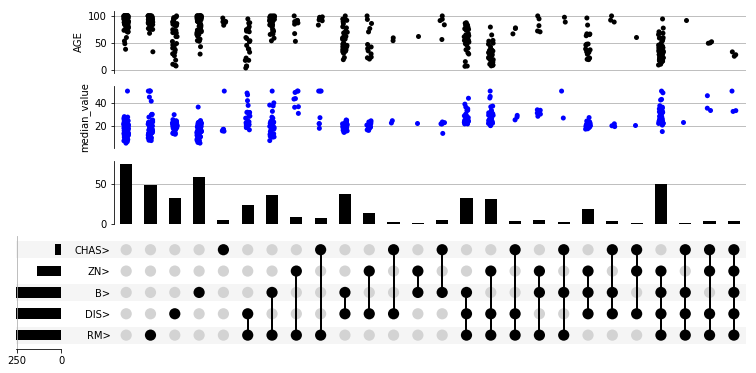

In [5]:
# UpSet plot it!
upset = UpSet(boston_df, sum_over=False, intersection_plot_elements=3)
upset.add_catplot(value='median_value', kind='strip', color='blue')
upset.add_catplot(value='AGE', kind='strip', color='black')
upset.plot()
#plt.show()

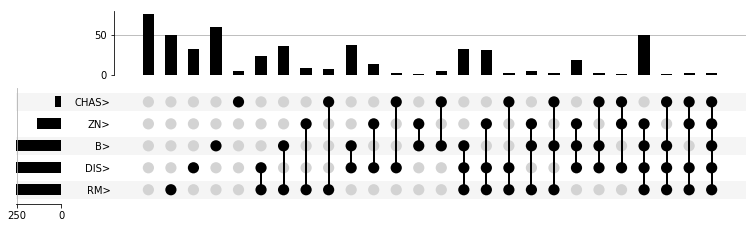

In [11]:
UpSet(boston_df, sum_over=False, intersection_plot_elements=3)